<h1>Handwritten Digit Classification Project</h1>
<b><p>This project focuses on building and deploying a neural network to classify handwritten digits (0–9) using the MNIST dataset. The model is integrated into a full-stack web application that allows users to draw digits and receive real-time predictions.</p></b>

<h2>Required libraries</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<h2>Data cleaning</h2>

<p>The MNIST data set was used to train the model.</p>
<h3>The main steps carried out are :</h3>
<div>
    <p>>&nbsp;&nbsp;&nbsp;&nbsp;Reshaping the data so that each column coressponds to a data point instead of the row</p>
    <p>>&nbsp;&nbsp;&nbsp;&nbsp;Normalizing the data</p>
    <p>>&nbsp;&nbsp;&nbsp;&nbsp;making  sure that each pixel either coressponds to a 0 or a 1 value, as that is the data sent to the model.</p>
</div>


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.reshape(X_train, (-1, 28*28)) #each column corresponds to one of 784 pixels
X_train = tf.cast(X_train, tf.float32) # chaning datatype from int to float
X_train = X_train/(X_train.numpy().max()) #normalizing by dividing every gray scale value with the max gray scale value (255)
X_train = tf.cast(X_train > 0.5, tf.float32)
X_train = 1 - X_train

X_test = tf.reshape(X_test, (-1, 28*28))
X_test = tf.cast(X_test, tf.float32)
X_test = X_test/(X_test.numpy().max())
X_test =  tf.cast(X_test > 0.5, tf.float32)
X_test = 1 - X_test

<h2>Model used for classification</h2>
<div>
    <h3>Model Architecture</h3>
    <p>A simple feesforward network was chosen to perform the classification. It's specifications are as follows:</p>
    <div>
        <p>&nbsp;&nbsp;&nbsp;&nbsp;<b>Input layer</b> : 784 neurons (one for each pixel)</p>
        <p>&nbsp;&nbsp;&nbsp;&nbsp;<b>First Hidden layer</b>: 256 neurons, ReLu as the activation function.</p>
        <p>&nbsp;&nbsp;&nbsp;&nbsp;<b>second Hidden layer</b>: 64 neurons, ReLu as the activation function.</p>
        <p>&nbsp;&nbsp;&nbsp;&nbsp;<b>output layer</b>: 10 neurons, softmax as the activation function as it gives a value between 0 and 1, this indicates the probability how  sure the netwok is classifing the digit.</p>
    </div>       
</div>

<div>
    <h3>Objective function and Optemizer</h3>
    <p>&nbsp;&nbsp;&nbsp;&nbsp;<b>Optimizer</b>: Adam</p>
    <p>&nbsp;&nbsp;&nbsp;&nbsp;<b>Objective function</b>:  sparse categorical entropy </p>
</div>



$$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \log(p_{i, y_i})
$$

In [3]:
model = models.Sequential()

model.add(layers.Dense(units = 256, activation = 'relu', input_shape = (784,)))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 10, activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


<h2>Model training</h2>

In [4]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5046 - accuracy: 0.8457 - val_loss: 0.3338 - val_accuracy: 0.8941
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - accuracy: 0.9094 - val_loss: 0.2649 - val_accuracy: 0.9194
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2222 - accuracy: 0.9312 - val_loss: 0.1975 - val_accuracy: 0.9370
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1904 - accuracy: 0.9414 - val_loss: 0.1635 - val_accuracy: 0.9465
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1638 - accuracy: 0.9487 - val_loss: 0.1442 - val_accuracy: 0.9558
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1481 - accuracy: 0.9536 - val_loss: 0.1453 - val_accuracy: 0.9544
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1307 - accuracy: 0.9599 - val_loss: 0.1418 - val_accuracy:

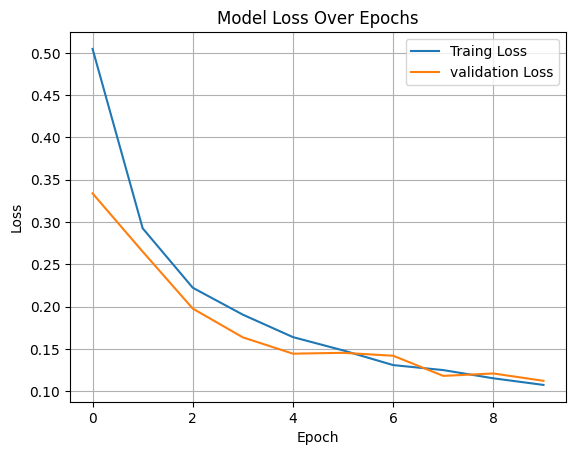

<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot(history.history['loss'], label = 'Traing Loss') # after each batch
plt.plot(history.history['val_loss'], label = 'validation Loss') #after each epoch
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('loss_training_validation.png')

<h2>Model Evaluation.</h2>

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1295 - accuracy: 0.9599


<h5>Final Loss : 0.1295</h5>
<h5>Final Accuracy : 95.99%</h5>

<h2>Saving model for backend use</h2>

In [42]:
model.save("C:\\CS\\workspace\\digit_classifier_final_folder\\static\\models\\hand_written_digit_classifier.h5")